<a href="https://colab.research.google.com/github/DB9653/Projektarbeit/blob/main/FINAL_NSIT_IIITDWD_GERMEVAL2018_subtaskA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/roushan-raj/HASOC-2020/blob/master/Models/German%20Models/German%20Sub-task%20A.ipynb


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'


# Dataset Reading


In [ ]:
import pandas as pd 
#data = pd.read_excel('/content/hasoc_2020_de_train_new_a.xlsx', converters={'tweet_id':int})
data = pd.read_csv("/content/germeval2018training.txt",sep="\t", encoding = "UTF-8", names=("text", "task1", "task2"))
pd.set_option('display.max_colwidth',150)
data.head(10)

,text,task1,task2
0,"@corinnamilborn Liebe Corinna, wir würden dich gerne als Moderatorin für uns gewinnen! Wärst du begeisterbar?",OTHER,OTHER
1,"@Martin28a Sie haben ja auch Recht. Unser Tweet war etwas missverständlich. Dass das BVerfG Sachleistungen nicht ausschließt, kritisieren wir.",OTHER,OTHER
2,@ahrens_theo fröhlicher gruß aus der schönsten stadt der welt theo ⚓️,OTHER,OTHER
3,@dushanwegner Amis hätten alles und jeden gewählt...nur Hillary wollten sie nicht und eine Fortsetzung von Obama-Politik erst recht nicht..!,OTHER,OTHER
4,@spdde kein verläßlicher Verhandlungspartner. Nachkarteln nach den Sondierzngsgesprächen - schickt diese Stümper #SPD in die Versenkung.,OFFENSE,INSULT
5,"@Dirki_M Ja, aber wo widersprechen die Zahlen denn denen, die im von uns verlinkten Artikel stehen? In unserem Tweet geht es rein um subs. Geschüt...",OTHER,OTHER
6,@milenahanm 33 bis 45 habe ich noch gar nicht gelebt und es geht mir am Arsch vorbei was in dieser Zeit geschehen ist. Ich lebe im heute und jetzt...,OFFENSE,PROFANITY
7,@jayxderxmensch @jayxthexhuman Wieso? Was findest du da unklar?,OTHER,OTHER
8,@tagesschau Euere AfD Hetze wirkt. Da könnt ihr stolz sein bei #ARD-Fernsehen,OFFENSE,ABUSE
9,"Deutsche Medien, Halbwahrheiten und einseitige Betrachtung, wie bei allen vom Staat finanzierten ""billigen"" Propagandainstitutionen 😜",OFFENSE,ABUSE


In [ ]:
data.shape

(5009, 3)

In [ ]:
print(data.dtypes)

text     object
task1    object
task2    object
dtype: object


# Making of "label" Variable


In [ ]:
label = data['task1']
label.head()

0      OTHER
1      OTHER
2      OTHER
3      OTHER
4    OFFENSE
Name: task1, dtype: object

# Checking Dataset Balancing


OTHER      3321
OFFENSE    1688
Name: task1, dtype: int64


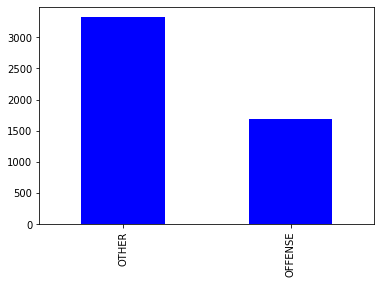

In [ ]:
print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')

# Converting label into "0" or "1"


In [ ]:
import numpy as np
classes_list = ["OFFENSE","OTHER"]
label_index = data['task1'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:10])



[1 1 1 1 0 1 0 1 0 0]


In [ ]:
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=2)

In [ ]:
print(label_twoDimension[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


# Making of "text" Variable


In [ ]:
text = data['text']
text.head(10)



0                                            @corinnamilborn Liebe Corinna, wir würden dich gerne als Moderatorin für uns gewinnen! Wärst du begeisterbar?
1           @Martin28a Sie haben ja auch Recht. Unser Tweet war etwas missverständlich. Dass das BVerfG Sachleistungen nicht ausschließt, kritisieren wir.
2                                                                                    @ahrens_theo fröhlicher gruß aus der schönsten stadt der welt theo ⚓️
3             @dushanwegner Amis hätten alles und jeden gewählt...nur Hillary wollten sie nicht und eine Fortsetzung von Obama-Politik erst recht nicht..!
4                 @spdde kein verläßlicher Verhandlungspartner. Nachkarteln nach den Sondierzngsgesprächen - schickt diese Stümper #SPD in die Versenkung.
5    @Dirki_M Ja, aber wo widersprechen die Zahlen denn denen, die im von uns verlinkten Artikel stehen? In unserem Tweet geht es rein um subs. Geschüt...
6    @milenahanm 33 bis 45 habe ich noch gar nicht gelebt und es geht 

# Dataset Pre-processing


In [ ]:
def remove_umlaut(string):
    """
    Removes umlauts from strings and replaces them with the letter+e convention
    :param string: string to remove umlauts from
    :return: unumlauted string
    """
    u = 'ü'.encode()
    U = 'Ü'.encode()
    a = 'ä'.encode()
    A = 'Ä'.encode()
    o = 'ö'.encode()
    O = 'Ö'.encode()
    ss = 'ß'.encode()

    string = string.encode()
    string = string.replace(u, b'ue')
    string = string.replace(U, b'Ue')
    string = string.replace(a, b'ae')
    string = string.replace(A, b'Ae')
    string = string.replace(o, b'oe')
    string = string.replace(O, b'Oe')
    string = string.replace(ss, b'ss')

    string = string.decode('utf-8')
    return string

In [ ]:
text_wo_umlauts = text.apply(lambda x:remove_umlaut(x))
text_wo_umlauts.head(10)

0                                         @corinnamilborn Liebe Corinna, wir wuerden dich gerne als Moderatorin fuer uns gewinnen! Waerst du begeisterbar?
1         @Martin28a Sie haben ja auch Recht. Unser Tweet war etwas missverstaendlich. Dass das BVerfG Sachleistungen nicht ausschliesst, kritisieren wir.
2                                                                                 @ahrens_theo froehlicher gruss aus der schoensten stadt der welt theo ⚓️
3           @dushanwegner Amis haetten alles und jeden gewaehlt...nur Hillary wollten sie nicht und eine Fortsetzung von Obama-Politik erst recht nicht..!
4             @spdde kein verlaesslicher Verhandlungspartner. Nachkarteln nach den Sondierzngsgespraechen - schickt diese Stuemper #SPD in die Versenkung.
5    @Dirki_M Ja, aber wo widersprechen die Zahlen denn denen, die im von uns verlinkten Artikel stehen? In unserem Tweet geht es rein um subs. Geschue...
6    @milenahanm 33 bis 45 habe ich noch gar nicht gelebt und es geht 

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text = text_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text.head(10)

0                                          corinnamilborn liebe corinna, wir wuerden dich gerne als moderatorin fuer uns gewinnen! waerst du begeisterbar 
1           ma in28a sie haben ja auch recht. unser tweet war etwas missverstaendlich. dass das bverfg sachleistungen nicht ausschliesst, kritisieren wir.
2                                                                                  ahrens theo froehlicher gruss aus der schoensten stadt der welt theo   
3             dushanwegner amis haetten alles und jeden gewaehlt...nur hillary wollten sie nicht und eine fo setzung von obama-politik erst recht nicht..!
4                spdde kein verlaesslicher verhandlungspa ner. nachka eln nach den sondierzngsgespraechen - schickt diese stuemper  spd in die versenkung.
5     dirki m ja, aber wo widersprechen die zahlen denn denen, die im von uns verlinkten a ikel stehen  in unserem tweet geht es rein um subs. geschuet...
6     milenahanm 33 bis 45 habe ich noch gar nicht gelebt und es geht 

# Removing stopwords


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_ns.head(10))

0                                                              corinnamilborn liebe corinna, wuerden gerne moderatorin fuer gewinnen! waerst begeisterbar 
1                                                         ma in28a ja recht. tweet missverstaendlich. bverfg sachleistungen ausschliesst, kritisieren wir.
2                                                                                              ahrens theo froehlicher gruss schoensten stadt welt theo   
3                                                    dushanwegner amis haetten gewaehlt...nur hillary wollten fo setzung obama-politik erst recht nicht..!
4                                           spdde verlaesslicher verhandlungspa ner. nachka eln sondierzngsgespraechen - schickt stuemper  spd versenkung.
5     dirki m ja, widersprechen zahlen denen, verlinkten a ikel stehen  tweet geht rein subs. geschuetzte. 2017 gesamte familiennachzug vergleich 2016 ...
6                                                              milenah

# Lemmatization

# Stemming

In [ ]:


# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text



In [ ]:
clean_text_stem = clean_text_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_stem.head())

0                        corinnamilborn liebe corinna, wuerden gerne moderatorin fuer gewinnen! waerst begeisterbar 
1                   ma in28a ja recht. tweet missverstaendlich. bverfg sachleistungen ausschliesst, kritisieren wir.
2                                                        ahrens theo froehlicher gruss schoensten stadt welt theo   
3              dushanwegner amis haetten gewaehlt...nur hillary wollten fo setzung obama-politik erst recht nicht..!
4     spdde verlaesslicher verhandlungspa ner. nachka eln sondierzngsgespraechen - schickt stuemper  spd versenkung.
Name: text, dtype: object


# Tokenization using "keras"


In [ ]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)

# Making Vocab for words


In [ ]:
vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)

17327


In [ ]:


l = tok_all.word_index
print(l)



{'lbr': 1, 'fuer': 2, 'merkel': 3, 'schon': 4, 'deutschland': 5, 'afd': 6, 'mehr': 7, 'mal': 8, 'ja': 9, 'ueber': 10, 'u': 11, 'immer': 12, 'heute': 13, 'gibt': 14, 'welt': 15, 'wer': 16, 'd': 17, 'nicht': 18, 'ist': 19, 'deutschen': 20, 'e': 21, 'deutsche': 22, 'land': 23, 'geht': 24, 'spd': 25, 'werden': 26, 'krippmarie': 27, 'en': 28, 'info2099': 29, 'amp': 30, 'petpanther0': 31, 'noherrman': 32, 'franz': 33, 'muessen': 34, 'md': 35, 'ellibisathide': 36, 'wuerde': 37, 'pa': 38, 'athinamala': 39, 'macmike': 40, 'a': 41, 'menschen': 42, 'thomasgbauer': 43, 'feldenfrizz': 44, 'gut': 45, 'macht': 46, 'charlie': 47, 'silve': 48, 'nasanasal': 49, 's': 50, 'koennen': 51, 'machtjanix23': 52, 'einfach': 53, 'lifetrend': 54, 'gruenen': 55, 'eu': 56, 'schmiddiemaik': 57, 'willjrosenblatt': 58, 'waere': 59, 'wurde': 60, 'seit': 61, 'politiker': 62, 'die': 63, 'putin': 64, 'cdu': 65, 'haben': 66, 'geld': 67, 'wohl': 68, 'warum': 69, 'gerade': 70, 'politik': 71, '2': 72, 'und': 73, 'troll': 74, '

# encoding or sequencing


In [ ]:
encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[0])
print(encoded_clean_text_stem[0])

 corinnamilborn liebe corinna, wuerden gerne moderatorin fuer gewinnen! waerst begeisterbar 
[4221, 191, 6796, 258, 233, 6797, 2, 2418, 2419, 6798]


# Pre-padding


In [ ]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')

# Reading Test data and Pre-processing


In [ ]:
import csv
data_t = pd.read_csv("/content/germeval2018.test.txt",sep='\t', encoding = "UTF-8", quoting=csv.QUOTE_NONE, names=("text", "task1", "task2"))
pd.set_option('display.max_colwidth',150)
data_t.head(10)



,text,task1,task2
0,"Meine Mutter hat mir erzählt, dass mein Vater einen Wahlkreiskandidaten nicht gewählt hat, weil der gegen die Homo-Ehe ist ☺",OTHER,OTHER
1,"@Tom174_ @davidbest95 Meine Reaktion; |LBR| Nicht jeder Moslem ist ein Terrorist. Aber jeder Moslem glaubt an Überlieferungen, die Gewalt und Terr...",OTHER,OTHER
2,"#Merkel rollt dem Emir von #Katar, der islamistischen Terror unterstützt, den roten Teppich aus.Wir brauchen einen sofortigen #Waffenstopp!",OTHER,OTHER
3,„Merle ist kein junges unschuldiges Mädchen“ Kch....... 😱 #tatort,OTHER,OTHER
4,@umweltundaktiv Asylantenflut bringt eben nur negatives für Deutschland. Drum Asylanenstop und Rückführung der Mehrzahl.,OFFENSE,ABUSE
5,@_StultaMundi Die Bibel enthält ebenfalls Gesetze des Zivil- und Strafrechts.,OTHER,OTHER
6,"@Thueringen_ @Miquwarchar @Pontifex_de Man munkelt, Franziskus ist großer ""Kiss""- und ""Black Sabbath""-Fan! #RockOn",OTHER,OTHER
7,"@hugresch @saltomentale Seit dem ist die Gesellschaft noch einmal deutlich vielfältiger geworden, auch durch die Globalisierung.",OTHER,OTHER
8,"""Wenn man Mädchen bildet, bildet man Generationen"" - Aqeela Asifi, Gewinnerin des #NansenAward 2015.",OTHER,OTHER
9,"@FeePatzer Frauen zu einem ""Ja"" zu überreden, ist nicht selten erfolgreich. Viele Frauen wollen nicht als zu leicht zu haben angesehen werden. Ode...",OFFENSE,ABUSE


In [ ]:
data_t.shape

(3532, 3)

In [ ]:
print(data_t.dtypes)

text     object
task1    object
task2    object
dtype: object


In [ ]:


label_t = data_t['task1']
label_t.head()



0      OTHER
1      OTHER
2      OTHER
3      OTHER
4    OFFENSE
Name: task1, dtype: object

OTHER      2330
OFFENSE    1202
Name: task1, dtype: int64


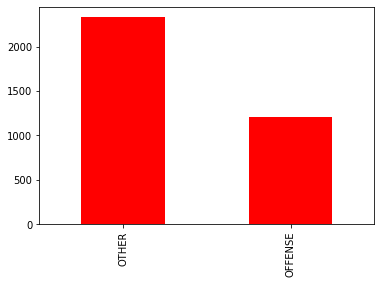

In [ ]:
print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')

In [ ]:


import numpy as np
classes_list_t = ["OFFENSE","OTHER"]
label_t_index = data_t['task1'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])



[1 1 1 1 0 1 1 1 1 0]


In [ ]:


from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=2)



In [ ]:
print(label_twoDimension_t[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [ ]:


text_t = data_t['text']
text_t.head(10)



0                             Meine Mutter hat mir erzählt, dass mein Vater einen Wahlkreiskandidaten nicht gewählt hat, weil der gegen die Homo-Ehe ist ☺
1    @Tom174_ @davidbest95 Meine Reaktion; |LBR| Nicht jeder Moslem ist ein Terrorist. Aber jeder Moslem glaubt an Überlieferungen, die Gewalt und Terr...
2              #Merkel rollt dem Emir von #Katar, der islamistischen Terror unterstützt, den roten Teppich aus.Wir brauchen einen sofortigen #Waffenstopp!
3                                                                                        „Merle ist kein junges unschuldiges Mädchen“ Kch....... 😱 #tatort
4                                 @umweltundaktiv Asylantenflut bringt eben nur negatives für Deutschland. Drum Asylanenstop und Rückführung der Mehrzahl.
5                                                                            @_StultaMundi Die Bibel enthält ebenfalls Gesetze des Zivil- und Strafrechts.
6                                       @Thueringen_ @Miquwarchar @Pon

In [ ]:
test_wo_umlauts = text_t.apply(lambda x: remove_umlaut(x))

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text_t = test_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text_t.head(10)

0                           meine mutter hat mir erzaehlt, dass mein vater einen wahlkreiskandidaten nicht gewaehlt hat, weil der gegen die homo-ehe ist  
1     tom174   davidbest95 meine reaktion;  lbr  nicht jeder moslem ist ein terrorist. aber jeder moslem glaubt an ueberlieferungen, die gewalt und ter...
2               merkel rollt dem emir von  katar, der islamistischen terror unterstuetzt, den roten teppich aus.wir brauchen einen sofo igen  waffenstopp!
3                                                                                         merle ist kein junges unschuldiges maedchen  kch.......    tato 
4                               umweltundaktiv asylantenflut bringt eben nur negatives fuer deutschland. drum asylanenstop und rueckfuehrung der mehrzahl.
5                                                                             stultamundi die bibel enthaelt ebenfalls gesetze des zivil- und strafrechts.
6                                       thueringen   miquwarchar  pont

In [ ]:


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))

0                                                                             mutter erzaehlt, vater wahlkreiskandidaten gewaehlt hat, homo-ehe  
1                              tom174   davidbest95 reaktion;  lbr  moslem terrorist. moslem glaubt ueberlieferungen, gewalt terror beguenstigen.
2                            merkel rollt emir  katar, islamistischen terror unterstuetzt, roten teppich aus.wir brauchen sofo igen  waffenstopp!
3                                                                                         merle junges unschuldiges maedchen  kch.......    tato 
4                                  umweltundaktiv asylantenflut bringt eben negatives fuer deutschland. drum asylanenstop rueckfuehrung mehrzahl.
5                                                                                stultamundi bibel enthaelt ebenfalls gesetze zivil- strafrechts.
6                                          thueringen   miquwarchar  pontifex de munkelt, franziskus grosser  kiss -  black 

# Stemming

In [ ]:
# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [ ]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_t_stem.head(10))

0                                                                             mutter erzaehlt, vater wahlkreiskandidaten gewaehlt hat, homo-ehe  
1                              tom174   davidbest95 reaktion;  lbr  moslem terrorist. moslem glaubt ueberlieferungen, gewalt terror beguenstigen.
2                            merkel rollt emir  katar, islamistischen terror unterstuetzt, roten teppich aus.wir brauchen sofo igen  waffenstopp!
3                                                                                         merle junges unschuldiges maedchen  kch.......    tato 
4                                  umweltundaktiv asylantenflut bringt eben negatives fuer deutschland. drum asylanenstop rueckfuehrung mehrzahl.
5                                                                                stultamundi bibel enthaelt ebenfalls gesetze zivil- strafrechts.
6                                          thueringen   miquwarchar  pontifex de munkelt, franziskus grosser  kiss -  black 

In [ ]:


import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)



In [ ]:


vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)



11999


In [ ]:
test_list = tok_test.word_index
print(test_list)

{'lbr': 1, 'fuer': 2, 'ja': 3, 'spd': 4, 'thomasmichael71': 5, 'mal': 6, 'miatamuc': 7, 'afd': 8, 'deutschland': 9, 'mehr': 10, 'frauen': 11, 'schon': 12, 'immer': 13, 'ist': 14, 'merkel': 15, 'mountainman1977': 16, 'gibt': 17, 'geht': 18, 'ueber': 19, 'nicht': 20, 'd': 21, 'beck': 22, 'e': 23, 'wer': 24, 'frau': 25, 'ma': 26, 'menschen': 27, 'gruenen': 28, 'werden': 29, 'pa': 30, 'heute': 31, 'rspctfl': 32, 'leben': 33, 'warum': 34, 'gut': 35, 'deutsche': 36, 'en': 37, 'ei': 38, 'houelle': 39, 'recht': 40, 'innenwelttramp': 41, 'waere': 42, 'haben': 43, 'koennen': 44, 'sein': 45, 'muessen': 46, 'cdu': 47, 'eigentlich': 48, 'deutschen': 49, 'ksemann2': 50, 'drkassandrapari': 51, 'wuerde': 52, 'genau': 53, 'f': 54, 'steht': 55, 'macht': 56, 'welt': 57, 've': 58, 'a': 59, 'tom174': 60, 'konseqliberal': 61, 'ergroovt': 62, 'einfach': 63, 'liebe': 64, 'nein': 65, 'besser': 66, 'islam': 67, 'endlich': 68, 'maenner': 69, 'fdp': 70, 'sind': 71, 'darf': 72, 'lassen': 73, 'kommt': 74, 'tun': 75

In [ ]:


encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])



mutter erzaehlt, vater wahlkreiskandidaten gewaehlt hat, homo-ehe  
[1866, 2879, 221, 86, 8520, 2263]


In [ ]:


from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')



# FastText Embeddings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gunzip /content/drive/MyDrive/cc.de.300.vec.gz

In [ ]:
# https://stackoverflow.com/questions/69964788/how-to-unzip-gz-file-using-google-colab

# FastText Embedding link - https://fasttext.cc/docs/en/crawl-vectors.html

import os
embeddings_index = {}
f = open('/content/drive/MyDrive/cc.de.300.vec',encoding='utf-8',errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 2000000 word vectors.


In [ ]:


embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector



# CNN 1 Model


In [ ]:


from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq



In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length)

In [ ]:
CNN1_network=Sequential([Embedding_Layer,
                        Conv1D(128,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dropout(0.3),
                       Dense(2,activation="sigmoid")
                       ])



In [ ]:
CNN1_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          5198400   
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          115328    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                        

In [ ]:
# https://stackoverflow.com/questions/62707558/importerror-cannot-import-name-adam-from-keras-optimizers
from tensorflow.keras.optimizers import Adam
CNN1_network.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN1_network, to_file='CNN2_model_GERMEVAL2018_Task_A.png', show_shapes=True, show_layer_names=True)

from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



In [ ]:


from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



# Model Fitting or Training


In [ ]:
hist = CNN1_network.fit(padded_clean_text_stem,label_twoDimension,epochs=200,batch_size=32,callbacks=[earlystopper, reduce_lr])

Epoch 1/200
157/157 [==============================] - 13s 13ms/step - loss: 0.6661 - accuracy: 0.6275 - lr: 3.0000e-05
Epoch 2/200
157/157 [==============================] - 2s 12ms/step - loss: 0.6419 - accuracy: 0.6630 - lr: 3.0000e-05
Epoch 3/200
157/157 [==============================] - 2s 12ms/step - loss: 0.6360 - accuracy: 0.6630 - lr: 3.0000e-05
Epoch 4/200
157/157 [==============================] - 2s 12ms/step - loss: 0.6324 - accuracy: 0.6630 - lr: 3.0000e-05
Epoch 5/200
157/157 [==============================] - 2s 12ms/step - loss: 0.6266 - accuracy: 0.6630 - lr: 3.0000e-05
Epoch 6/200
157/157 [==============================] - 2s 12ms/step - loss: 0.6180 - accuracy: 0.6632 - lr: 3.0000e-05
Epoch 7/200
157/157 [==============================] - 2s 12ms/step - loss: 0.6073 - accuracy: 0.6640 - lr: 3.0000e-05
Epoch 8/200
157/157 [==============================] - 2s 12ms/step - loss: 0.5929 - accuracy: 0.6712 - lr: 3.0000e-05
Epoch 9/200
157/157 [==========================

# log loss

In [ ]:
CNN1_network_predictions = CNN1_network.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN1_network_predictions)
log_loss_test

3.3113804224712045

# Classification Report


In [ ]:
predictions = np.zeros_like(CNN1_network_predictions)
predictions[np.arange(len(CNN1_network_predictions)), CNN1_network_predictions.argmax(1)] = 1



In [ ]:


predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger



array([1, 0, 0, ..., 1, 1, 0])

In [ ]:


pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task1"])
print(df)



      task1
0         1
1         0
2         0
3         1
4         0
...     ...
3527      1
3528      1
3529      1
3530      1
3531      0

[3532 rows x 1 columns]


In [ ]:
df.to_csv("NSIT_GERMEVAL2018_Task_A_submission_DE_A.csv", index=False)

In [ ]:


from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))



              precision    recall  f1-score   support

           0       0.59      0.38      0.46      1202
           1       0.73      0.87      0.79      2330

   micro avg       0.70      0.70      0.70      3532
   macro avg       0.66      0.62      0.63      3532
weighted avg       0.68      0.70      0.68      3532
 samples avg       0.70      0.70      0.70      3532



# Epoch v/s Loss Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

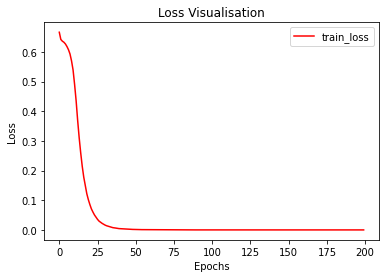

In [ ]:


from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN1_GERMEVAL2018_Task_A_Ger_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN1_GERMEVAL2018_Task_A_Ger_lossPlot.pdf') 



# Epoch v/s Accuracy Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

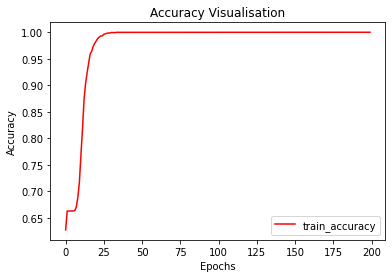

In [ ]:


plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN1_GERMEVAL2018_Task_A_Ger_accuracyPlot.pdf',dpi=1000)
files.download('CNN1_GERMEVAL2018_Task_A_Ger_accuracyPlot.pdf') 



# Area under Curve-ROC


In [ ]:


pred_train = CNN1_network.predict(padded_clean_text_stem)
pred_test = CNN1_network.predict(padded_clean_text_t_stem)



In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN1_GERMEVAL2018_Task_A_Ger_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN1_GERMEVAL2018_Task_A_Ger_Area_RocPlot.pdf')

  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

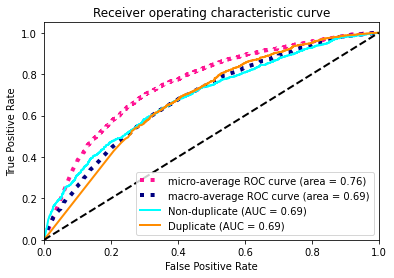

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)